In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
from scipy.special import factorial

In [10]:
frame_length = 26
number_of_drops = 1e6 # Scientific notation: for example 5e7 = 5*10^7 or 3e-4 = 3*10^-4
max_simulated_users = 25
lambdas = np.arange(0.025,0.26,0.025)
results_multi = np.array([[0,0,0,0,0,11,46,141,429,1380,4660,14811,44096,117462,269757,509788,768728,938511,993832,999905,1000000,1000000,1000000,1000000,1000000],
                         [0,0,2,5,19,49,145,309,837,2097,5838,16794,45420,115631,255327,474096,720543,902245,980857,998280,999941,1000000,1000000,1000000,1000000],
                         [0,14,63,101,157,311,450,717,1333,2869,6700,17314,46652,116267,256776,475239,721528,902427,980797,998290,999928,1000000,1000000,1000000,1000000]])

In [11]:
largest_lambda = lambdas[-1]*frame_length
error = largest_lambda**(max_simulated_users+1) / factorial(max_simulated_users+1)
print(f'Approximation error for the given range of simulated users: {error}')

Approximation error for the given range of simulated users: 3.3894423061668177e-06


In [12]:
def g(intensities):
    res_s = []
    for failure_prob in failure_probs:
        res = np.array([])
        for intensity in intensities:
            res = np.append(res, np.sum(failure_prob*np.exp(-intensity*frame_length)*(intensity*frame_length)**user_range / factorial(user_range)))
        res_s.append(res)
    return np.array(res_s).swapaxes(0,1)

In [13]:
failure_probs = results_multi/number_of_drops
error_probs = np.array([])
user_range = np.arange(1,max_simulated_users + 0.1, 1)
error_probs = g(lambdas)

In [14]:
xpoints = np.linspace(lambdas[0],lambdas[-1],1000)
curves = g(xpoints)

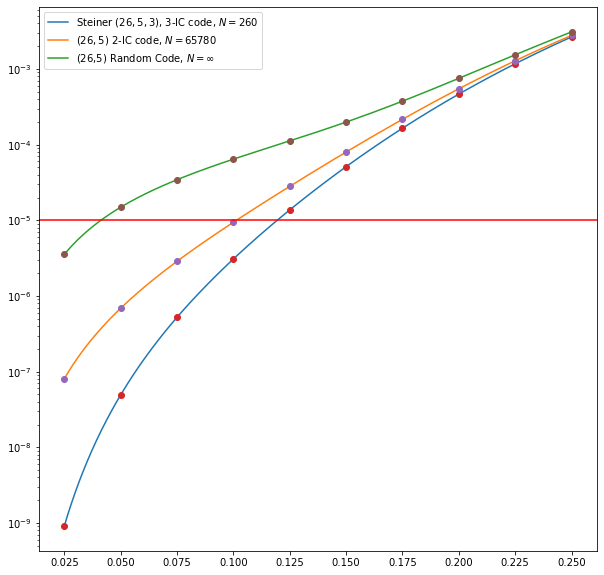

In [15]:
c_t = curves.swapaxes(0,1)
fig, ax = plt.subplots(figsize=(10,10))
fig.patch.set_facecolor('white')
line1, = ax.semilogy(xpoints, c_t[0], label='line1')
line2, = ax.semilogy(xpoints, c_t[1], label='line2')
line3, = ax.semilogy(xpoints, c_t[2], label='line3')
scatter = ax.plot(lambdas, error_probs, 'o')
ax.legend([line1, line2, line3], ["Steiner $(26,5,3)$, 3-IC code, $N=260$", "$(26,5)$ 2-IC code, $N=65780$", "(26,5) Random Code, $N=\infty$"])
plt.axhline(y = 1e-5, color = 'r', linestyle = '-')
_ = plt.xticks(lambdas) # Disable trash output by assigning it to _